In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/hotel_review_75000.csv', encoding='utf-8')

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
0,0,356,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 1월 26일,10.0,직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...,True
1,1,357,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2019년 2월 4일,10.0,웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...,True
2,2,358,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2019년 2월 2일,10.0,서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...,True
3,3,359,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 1월 26일,10.0,가격에 맞게 만족했습니다,True
4,4,360,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 25일,10.0,처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...,True


In [4]:
stopwords = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/%ED%95%9C%EA%B5%AD%EC%96%B4%EB%B6%88%EC%9A%A9%EC%96%B4100.txt', encoding='utf-8', header=None, sep='\t')

In [5]:
stopwords.head()

,0
0,이
1,있
2,하
3,것
4,들


In [82]:
stopwords[stopwords[0]=='좀']

,0
103,좀


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  75000 non-null  int64  
 1   Unnamed: 0    75000 non-null  int64  
 2   hotelId       75000 non-null  int64  
 3   hotelName     75000 non-null  object 
 4   tripType      75000 non-null  object 
 5   tripTypeText  75000 non-null  object 
 6   reviewDate    75000 non-null  object 
 7   rating        75000 non-null  float64
 8   description   75000 non-null  object 
 9   isKorNot      75000 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(5)
memory usage: 5.2+ MB


In [9]:
data['rating'].unique()

array([10.,  8.,  4.,  6.,  2.])

In [56]:
data[data['rating']==2.0]

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
41,41,398,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2018년 11월 4일,2.0,보통 이 뷰 남기 지 않 는데 처음 으로 남겨 봅니다 국내외 특급 호텔 많이 다녀 ...,True
43,43,400,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),other,2박 여행,2018년 2월 14일,2.0,고객 을 편안히 개 만드 는 법 을 잘 아 는 호텔 입니다 오랜 역사 가 과연 명불...,True
82,82,460,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2박 가족 여행,2020년 8월 2일,2.0,체크인 한 시간 걸렸 고 둘째 날 오전 에 나가 면서 청소 좀 부탁 하 고 오후 세...,True
166,166,870,106097,그랜드 하얏트 서울 (Grand Hyatt Seoul),other,1박 여행,2020년 4월 22일,2.0,체크인 할 때 는 친절히 잘 해 주 셨 는데 방 에 들어가 자마자 침대 에 긴 머리...,True
168,168,872,106097,그랜드 하얏트 서울 (Grand Hyatt Seoul),other,1박 여행,2020년 4월 9일,2.0,예약자 및 카드 결제 자 는 본인 명의 로 하 였 고 신분증 과 본 인명 의 크 레...,True
...,...,...,...,...,...,...,...,...,...,...
74865,74865,223635,798187136,다로산 펜션 (Darosan Pension),romance,2박 로맨틱 여행,2019년 7월 27일,2.0,방 더럽 고 주변 에 관광지 가 걸어가 기 어려운 거리 에 있 는데 주차 공간 조차...,True
74913,74913,223818,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2020년 10월 7일,2.0,서비스 나 그런 건 다 만 졷하였으나 시끄러워서 잠 한 숨 못 잤 습니다 에어컨 소...,True
74939,74939,223858,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 7월 29일,2.0,에어컨 이 23 도 차이 엿 을 때 자동 으로 켜 지 고 온 도조 널 이 되 는데 ...,True
74942,74942,223861,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,1박 로맨틱 여행,2019년 7월 31일,2.0,층 마다 호수 는 많 은 데 엘 레베 이터 3 개 에 좁 아서 너무 불편 했 습니다...,True


In [57]:
data[data['rating']==4.0]

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
15,15,371,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2018년 12월 8일,4.0,가성 비 별로 였 습니다 기대 를 많이 했 기 에 실망 도 컸 다고 봅니다 예약 하...,True
75,75,452,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2020년 8월 14일,4.0,사람 이 너무 많 아서 제대로 즐기 지 못했 어요,True
112,112,490,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2020년 4월 24일,4.0,사람 들 이 많 았 는데 라운지 음식 도 바로 바로 채워 주 는 것 도 아니 였 습...,True
130,130,508,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2020년 4월 30일,4.0,라운지 수용 인원 이상 으로 손님 을 너무 많이 받 아서 여유 있 게 즐기 기 어려웠어요,True
179,179,883,106097,그랜드 하얏트 서울 (Grand Hyatt Seoul),family,1박 가족 여행,2020년 6월 11일,4.0,방음 이 안 되 는 건지 옆방 투숙객 이 너무 시끄러워서 새벽 까지 못 자 고 계속...,True
...,...,...,...,...,...,...,...,...,...,...
74890,74890,223783,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),with-friends,친구와 1박 여행,2020년 8월 19일,4.0,성수기 라고 하 지만 이 가격 에 이건 아니 죠 다시 는 이용 하 고 싶 지 않 네...,True
74901,74901,223798,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),other,1박 여행,2020년 7월 18일,4.0,겉 은 괜찮 은데 방음 너무 안 되 구요 윗 층 옆방 에서 복도 에서 쿵쾅대 는 소...,True
74964,74964,223883,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),with-friends,친구와 1박 여행,2019년 8월 8일,4.0,친구 랑 둘 이 서 패밀리 룸 씨 뷰 로 예약 했 는데 침대 에 누웠 다가 깜짝 놀...,True
74972,74972,223891,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 10월 18일,4.0,냉난방 조절 이 따로 안 됨 티비 등 메뉴 얼 이 비치 되 어 있 지 않 음 외국인...,True


In [59]:
data[data['rating']==8.0]

,Unnamed: 0.1,Unnamed: 0,hotelId,hotelName,tripType,tripTypeText,reviewDate,rating,description,isKorNot
13,13,369,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2018년 12월 23일,8.0,주니어 스위트 로 더블 싱글 침대 가 있 어 모두 편히 잠 을 잘 수 있 었 습니다...,True
18,18,374,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,1박 가족 여행,2018년 12월 29일,8.0,직원 친절 하 고 시설 좋 았 음,True
21,21,377,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),romance,1박 로맨틱 여행,2019년 3월 1일,8.0,조선호텔 은 처음 숙박 하 는 데 듣 던 대로 직원 분 들 의 서비스 는 좋 았 습...,True
33,33,390,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),family,2박 가족 여행,2019년 5월 4일,8.0,인테리어 는 오래 된 호텔 이 라 특별히 좋 거나 세련 되 지 는 않 았 지만 스위...,True
37,37,394,105343,서울 웨스틴조선호텔 (The Westin Chosun Seoul),with-friends,친구와 1박 여행,2019년 1월 19일,8.0,따뜻 한 느낌 의 서비스,True
...,...,...,...,...,...,...,...,...,...,...
74989,74989,223908,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 8월 18일,8.0,설악산 이 근처 에 있 고 작 지만 시설 도 괜찮 았 고 만족 한 여행 이 었 습니다,True
74993,74993,223912,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,2박 가족 여행,2019년 8월 14일,8.0,새로 지 은 호텔 이 라 전반 적 상태 는 좋 아요 옆 에 고층 건물 이 올라와서 ...,True
74996,74996,223915,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),romance,2박 로맨틱 여행,2018년 11월 30일,8.0,객실 은 깔끔 하 고 에메 니티 도 딱 필요 한 만큼 있 었 습니다 5 분 거리 에...,True
74997,74997,223916,798937728,씨 크루즈 호텔 (Sea Cruise Hotel),family,1박 가족 여행,2019년 12월 4일,8.0,배드 가 좋 고 조용 해서 좋 았 습니다 찬바람 이 좀 들어와서 난방기 를 12 시...,True


In [10]:
data['rating'].value_counts()

rating
10.0    34103
8.0     24283
6.0      8877
4.0      4278
2.0      3459
Name: count, dtype: int64

In [14]:
data['description'][777]

'가족 여행으로 호텔에 숙박했습니다 그런데 대로변 View로 방을 주셨는데 옆에 건물에 전광판이 너무 밝아서 늦게까지 잠을 이루기 어려웠습니다 게다가 옆방인지 윗방인지 알 수 없는 곳에서 소음이 넘어와서숙면을 취하기는 참 어려웠네요 재방문 의사는 없습니다'

In [15]:
import re

In [16]:
def text_clean(x):
    pattern = r'[가-힣 0-9 a-z A-Z]+'
    matches = re.findall(pattern, x)
    matches = "".join(matches)
    return matches

In [17]:
data['description'] = data['description'].apply(text_clean)

In [18]:
data['description']

0        직원들 서비스나 마인드 완벽합니다 다만 노후된 시설과 좁은 라운지가 호텔 이름에 비...
1        웨스틴조선은 모든면에서 최고의 숙소라고 생각합니다 분위기 편의성 직원친절도까지 모두...
2        서울시내에서 호캉스를 누릴 수 있는 곳아침 뷔페가 맛있는 곳룸서비스가 좋았음요구사항...
3                                            가격에 맞게 만족했습니다
4        처음 세명으로 셋팅 되어있지 않은점 빼고는 직원들의 친절도 및 서비스는 모두 맘에 ...
                               ...                        
74995    조식과 스탠더드 하프전망 신청해서  1박 했는데요너무 좋아요다만 가격이 좀 나가고 ...
74996    객실은 깔끔하고 에메니티도 딱 필요한만큼 있었습니다 5분거리에 중앙시장이 있어 쇼핑...
74997    배드가 좋고 조용해서 좋았습니다찬바람이 좀 들어와서 난방기를 12시간 정도 돌려야 ...
74998    우선 위치가 너무 좋았고 숙소에 짐을 놓고 걸어서 주변 가볼곳도 있고 먹거리도 맛있...
74999    주차장이 부족해서 다른데에 주차했는데 아침에 이동해달라는 전화가 와서 다소 불쾌했슴...
Name: description, Length: 75000, dtype: object

In [19]:
from konlpy.tag import Mecab

In [20]:
mecab = Mecab()

In [21]:
def tokenizer(text):
    tokens=mecab.morphs(text)
    #print(tokens)
    return tokens

In [22]:
tokenizer(data['description'][777])

['가족',
 '여행',
 '으로',
 '호텔',
 '에',
 '숙박',
 '했',
 '습니다',
 '그런데',
 '대로변',
 'View',
 '로',
 '방',
 '을',
 '주',
 '셨',
 '는데',
 '옆',
 '에',
 '건물',
 '에',
 '전광판',
 '이',
 '너무',
 '밝',
 '아서',
 '늦',
 '게',
 '까지',
 '잠',
 '을',
 '이루',
 '기',
 '어려웠',
 '습니다',
 '게다가',
 '옆방',
 '인지',
 '윗방',
 '인지',
 '알',
 '수',
 '없',
 '는',
 '곳',
 '에서',
 '소음',
 '이',
 '넘어와서',
 '숙면',
 '을',
 '취하',
 '기',
 '는',
 '참',
 '어려웠',
 '네요',
 '재',
 '방문',
 '의사',
 '는',
 '없',
 '습니다']

In [23]:
data['description']=data['description'].apply(tokenizer)

In [26]:
data['description'][0]

['직원',
 '들',
 '서비스',
 '나',
 '마인드',
 '완벽',
 '합니다',
 '다만',
 '노후',
 '된',
 '시설',
 '과',
 '좁',
 '은',
 '라운지',
 '가',
 '호텔',
 '이름',
 '에',
 '비해',
 '약간',
 '부족',
 '합니다']

In [27]:
def remove_stopwords(x):
    cleaned = []
    for i in x:
        if i not in stopwords:
            cleaned.append(i)
    cleaned = " ".join(cleaned)
    
    return cleaned

In [28]:
data['description']=data['description'].apply(remove_stopwords)

In [29]:
data['description'][0]

'직원 들 서비스 나 마인드 완벽 합니다 다만 노후 된 시설 과 좁 은 라운지 가 호텔 이름 에 비해 약간 부족 합니다'

In [32]:
text = ' '.join(data['description'])

In [30]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf').generate(text)

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

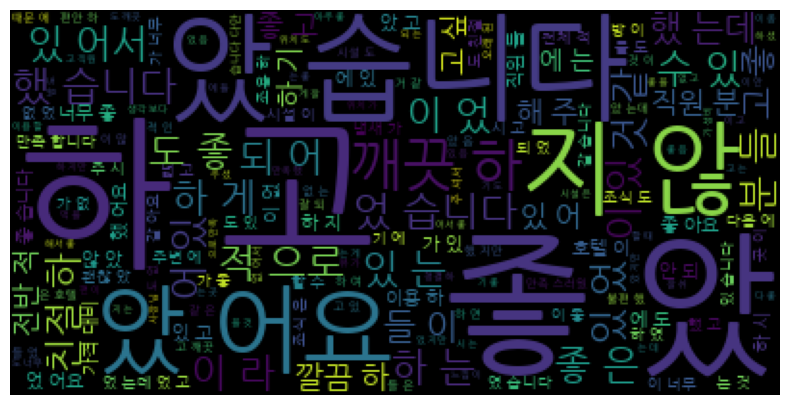

In [35]:

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')

In [36]:
X = data['description']
y = data['rating']

In [68]:
y2 = data['rating'].apply(lambda x: 1 if x >= 8.0 else 0)

In [69]:
y2.unique()

array([1, 0])

In [37]:
X

0        직원 들 서비스 나 마인드 완벽 합니다 다만 노후 된 시설 과 좁 은 라운지 가 호...
1        웨스틴 조선 은 모든 면 에서 최고 의 숙소 라고 생각 합니다 분위기 편의 성 직원...
2        서울 시내 에서 호 캉 스 를 누릴 수 있 는 곳 아침 뷔페 가 맛있 는 곳 룸서비...
3                                        가격 에 맞 게 만족 했 습니다
4        처음 세 명 으로 셋 팅 되 어 있 지 않 은 점 빼 고 는 직원 들 의 친절 도 ...
                               ...                        
74995    조식 과 스탠더드 하프 전망 신청 해서 1 박 했 는데요 너무 좋 아요 다만 가격 ...
74996    객실 은 깔끔 하 고 에메 니티 도 딱 필요 한 만큼 있 었 습니다 5 분 거리 에...
74997    배드 가 좋 고 조용 해서 좋 았 습니다 찬바람 이 좀 들어와서 난방기 를 12 시...
74998    우선 위치 가 너무 좋 았 고 숙소 에 짐 을 놓 고 걸어서 주변 가 볼 곳 도 있...
74999    주차장 이 부족 해서 다른 데 에 주차 했 는데 아침 에 이동 해 달 라는 전화 가...
Name: description, Length: 75000, dtype: object

In [38]:
y

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
74995    10.0
74996     8.0
74997     8.0
74998     8.0
74999     6.0
Name: rating, Length: 75000, dtype: float64

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv = CountVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=3, ngram_range=(1,2))
X_cv=cv.fit_transform(X)



/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_cv, y, test_size=0.4,random_state=7)

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [52]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
pred=mnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.5836666666666667
              precision    recall  f1-score   support

         2.0       0.52      0.49      0.50      1423
         4.0       0.29      0.14      0.19      1682
         6.0       0.36      0.39      0.38      3524
         8.0       0.50      0.48      0.49      9762
        10.0       0.71      0.78      0.74     13609

    accuracy                           0.58     30000
   macro avg       0.48      0.45      0.46     30000
weighted avg       0.57      0.58      0.57     30000



In [70]:
cv = CountVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=3, ngram_range=(1,2))
X_cv=cv.fit_transform(X)



/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_cv, y2, test_size=0.4,random_state=7)

In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [74]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
pred=mnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8696666666666667
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      6629
           1       0.93      0.90      0.92     23371

    accuracy                           0.87     30000
   macro avg       0.81      0.83      0.82     30000
weighted avg       0.87      0.87      0.87     30000



In [47]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [75]:
tfidf_vec = TfidfVectorizer(tokenizer=tokenizer, max_df=0.8, min_df=3, ngram_range=(1,2))
X_tfidf_vec=tfidf_vec.fit_transform(X)



/home/user/miniforge3/envs/nlp/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_vec, y2, test_size=0.4,random_state=7)

In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [78]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
pred=mnb.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.8347
              precision    recall  f1-score   support

           0       0.90      0.28      0.43      6629
           1       0.83      0.99      0.90     23371

    accuracy                           0.83     30000
   macro avg       0.86      0.64      0.67     30000
weighted avg       0.85      0.83      0.80     30000

